In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
# path of data 
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

In [ ]:
X= df[['highway-mpg']]
Y = df[['price']]
lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
lm1 = LinearRegression()
Z= df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1.fit(Z, df[['price']])


In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
width = 10
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x= 'highway-mpg',y ='price',data = df)
plt.ylim(0,)

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x= 'peak-rpm', y= 'price', data = df)
plt.ylim(0,)

In [ ]:
df[['peak-rpm','highway-mpg','price']].corr()

In [ ]:
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

C:\Users\Anuj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


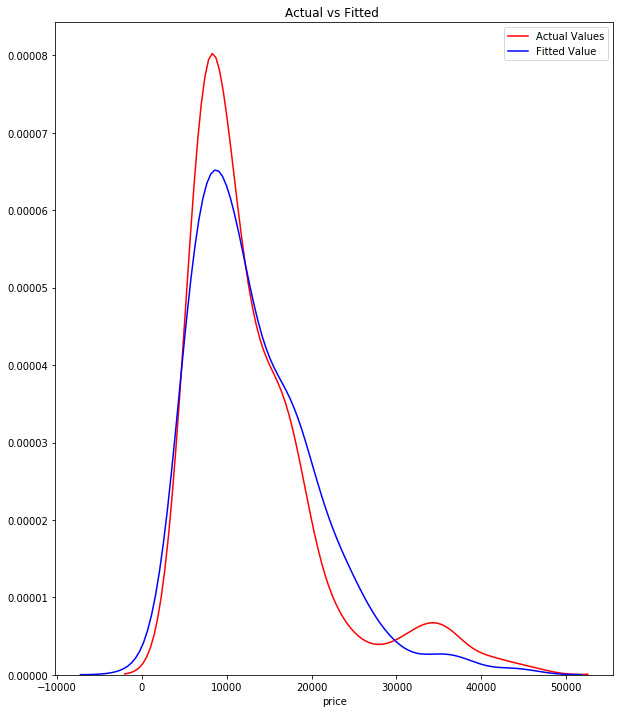

In [34]:
Y_hat = lm1.predict(Z)
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df['price'],hist = False, color = "r", label = "Actual Values")
sns.distplot(Y_hat, hist=False, color = 'b', label ='Fitted Value', ax = ax1)
plt.title("Actual vs Fitted ")
plt.xlabel='price'
plt.ylabel='proportion of car'

plt.show()
plt.close()

Non linear models
first defining a function for plotting

In [65]:
def plotpolly(model, independent_variable, dependent_variable,  Name):
    x_new = np.linspace(15, 55, 100) #here creating for the x - axis
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Ploynomial fit with matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("price of the Cars")
    
    plt.show()
    plt.close()
    
    
print("Done")

Done


In [66]:
x = df['highway-mpg']
y = df['price']
print("Done")

Done


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

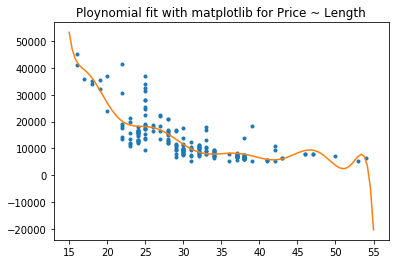

In [78]:
# Here we are going to use a polynomial of 3rd order
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
plotpolly(p,x,y,'highway-mpg')



In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pr = PolynomialFeatures(degree=2)
pr
Z_pr = pr.fit_transform(Z)
Z.shape
Z_pr.shape


(201, 15)

Now Creating Pipeline

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [84]:
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])


<h1> Question  #5: </h1>
<b>  Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y  </b>


In [93]:
Input1 = [('scaler', StandardScaler()),  ('model', LinearRegression())]
pipe2 = Pipeline(Input1)
pipe2

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [94]:
pipe2.fit(Z,y)
ypipe2 = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [96]:
#highway-mpg fit
lm.fit(X,Y)
# find the R^2
lm.score(X, Y)


0.4965911884339175

In [97]:
Yhat = lm.predict(X)
Yhat[0:4]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ]])

In [98]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(df['price'], Yhat)

31635042.944639895

Calculating the mean squared error for multiple linear regression

In [101]:
# fit the model
lm.fit(Z, df['price'])
#find the R^2 
lm.score(Z, df['price'])

0.8093562806577457

In [103]:
Y_predict_multifit = lm.predict(Z)
mean_squared_error(df['price'], Y_predict_multifit)

11980366.87072649

Model 3: Polynomial fit

In [104]:
from sklearn.metrics import r2_score

In [105]:
r_squared = r2_score(y, p(x))
r_squared

0.702376908737018

Calculating MSE

In [106]:
mean_squared_error(df['price'], p(x))

18703127.67098826

Prediction and decision making

In [107]:
new_input = np.arange(1,100,1).reshape(-1,1) # reshape(-1,1) means that we shape it in unknown rows and only one column

In [109]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
yhat = lm.predict(new_input)
yhat[0:10]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655],
       [33492.90558823],
       [32671.1722099 ],
       [31849.43883158],
       [31027.70545326],
       [30205.97207494]])

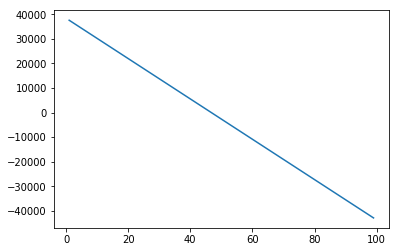

In [112]:
plt.plot(new_input, yhat)
plt.show()